# import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load both train and test dataset

In [18]:
train_data =  pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")

# Explore data analysis

In [3]:
print(f"Train dataset shape:(rows ={train_data.shape[0]},columns={train_data.shape[1]})\nTest dataset shape:(rows={test_data.shape[0]},columns={test_data.shape[1]})")

Train dataset shape:(rows =1296675,columns=23)
Test dataset shape:(rows=555719,columns=23)


In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train_data.isnull().sum()
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

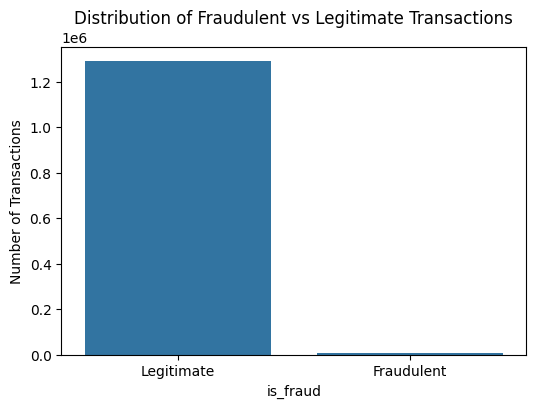

In [9]:
# Target Variable Distribution
fraud_counts = train_data['is_fraud'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraudulent vs Legitimate Transactions')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.ylabel('Number of Transactions')
plt.show()

In [10]:
#to identify the unique value in each column
train_data.nunique().sort_values(ascending=False)

Unnamed: 0               1296675
trans_num                1296675
merch_long               1275745
unix_time                1274823
trans_date_trans_time    1274791
merch_lat                1247805
amt                        52928
cc_num                       983
street                       983
zip                          970
long                         969
lat                          968
dob                          968
city                         894
city_pop                     879
merchant                     693
job                          494
last                         481
first                        352
state                         51
category                      14
gender                         2
is_fraud                       2
dtype: int64

**Data perperocess**

# 1 Remove irrelevent columns

In [32]:
#Remove irrelevent and redundence columns from both train and test datasets
col_to_drop = ["Unnamed: 0","unix_time","merchant","first","last","street","city","zip","job","trans_num",]
train_data.drop(col_to_drop,axis=1,inplace=True)
test_data.drop(col_to_drop,axis=1,inplace=True)

# 2 Feature Engineering

In [20]:
# Feature extract from trans_date_trans_time
# Convert to datetime for train
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

# New features
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day_of_week'] = train_data['trans_date_trans_time'].dt.dayofweek  # 0=Mon, 6=Sun
train_data['month'] = train_data['trans_date_trans_time'].dt.month


# Convert to datetime for test
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

# New features
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['day_of_week'] = test_data['trans_date_trans_time'].dt.dayofweek  # 0=Mon, 6=Sun
test_data['month'] = test_data['trans_date_trans_time'].dt.month

In [ ]:
#feature extraction from dob
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['cust_age'] = (train_data['trans_date_trans_time'] - train_data['dob']).dt.days / 365.25

test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data['cust_age'] = (test_data['trans_date_trans_time'] - test_data['dob']).dt.days / 365.25

train_data['cust_age'].head() # lets look at the newly arrived age column

0    30.814511
1    40.531143
2    56.950034
3    51.969884
4    32.763860
Name: cust_age, dtype: float64

In [ ]:
#featrue extracting from merchent and card holder lat-long
# Feature extraction for train_data
train_data['lat_dist_cust_merch'] = (train_data['lat'] - train_data['merch_lat']).abs()
train_data['long_dist_cust_merch'] = (train_data['long'] - train_data['merch_long']).abs()

train_data['prev_merch_lat'] = train_data.groupby(by=['cc_num'])['merch_lat'].shift(1)  # Previous merchant latitude
train_data['prev_merch_long'] = train_data.groupby(by=['cc_num'])['merch_long'].shift(1)  # Previous merchant longitude

train_data['lat_dist_prev_merch'] = (train_data['merch_lat'] - train_data['prev_merch_lat']).abs()  # Distance to previous merchant latitude
train_data['long_dist_prev_merch'] = (train_data['merch_long'] - train_data['prev_merch_long']).abs()  # Distance to previous merchant longitude

In [28]:
# Feature extraction for test_data
test_data['lat_dist_cust_merch'] = (test_data['lat'] - test_data['merch_lat']).abs()
test_data['long_dist_cust_merch'] = (test_data['long'] - test_data['merch_long']).abs()

test_data['prev_merch_lat'] = test_data.groupby(by=['cc_num'])['merch_lat'].shift(1)  # Previous merchant latitude
test_data['prev_merch_long'] = test_data.groupby(by=['cc_num'])['merch_long'].shift(1)  # Previous merchant longitude

test_data['lat_dist_prev_merch'] = (test_data['merch_lat'] - test_data['prev_merch_lat']).abs()  # Distance to previous merchant latitude
test_data['long_dist_prev_merch'] = (test_data['merch_long'] - test_data['prev_merch_long']).abs()  # Distance to previous merchant longitude

In [ ]:
# list of the columns to be dropped
drop_cols2 = ['trans_date_trans_time','cc_num','lat','long','merch_lat','merch_long','prev_merch_lat','prev_merch_long','dob']

In [ ]:
train_data.drop(drop_cols2, axis = 1, inplace = True)
train_data.reset_index(drop=True, inplace = True)


test_data.drop(drop_cols2, axis = 1, inplace = True)
test_data.reset_index(drop=True, inplace = True)


In [35]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   category              1296675 non-null  object 
 1   amt                   1296675 non-null  float64
 2   gender                1296675 non-null  object 
 3   state                 1296675 non-null  object 
 4   city_pop              1296675 non-null  int64  
 5   is_fraud              1296675 non-null  int64  
 6   hour                  1296675 non-null  int32  
 7   day_of_week           1296675 non-null  int32  
 8   month                 1296675 non-null  int32  
 9   cust_age              1296675 non-null  float64
 10  lat_dist_cust_merch   1296675 non-null  float64
 11  long_dist_cust_merch  1296675 non-null  float64
 12  lat_dist_prev_merch   1295692 non-null  float64
 13  long_dist_prev_merch  1295692 non-null  float64
dtypes: float64(6), int32(3), int64(2),

# 3 Categorical Encode

In [36]:
#traget encoder for both train and test data
# Mean fraud rate per state
state_target = train_data.groupby("state")["is_fraud"].mean()
train_data["state_te"] = train_data["state"].map(state_target)

state_test_target = test_data.groupby("state")["is_fraud"].mean()
test_data["state_te"] = test_data["state"].map(state_test_target)

In [ ]:
#one hot encoder
train_data = pd.get_dummies(train_data, columns=["gender","category"], drop_first=True)

test_data = pd.get_dummies(test_data, columns=["gender","category"], drop_first=True)

In [43]:
train_data.drop(columns=["state"],axis=1,inplace=True)
test_data.drop(columns=["state"],axis=1,inplace=True)

In [49]:
# Convert all boolean columns to int
train_data = train_data.astype({col: int for col in train_data.select_dtypes('bool').columns})
test_data = test_data.astype({col: int for col in test_data.select_dtypes('bool').columns})



In [45]:
train_data["lat_dist_prev_merch"].fillna(train_data["lat_dist_prev_merch"].median(), inplace=True)
train_data["long_dist_prev_merch"].fillna(train_data["long_dist_prev_merch"].median(), inplace=True)

test_data["lat_dist_prev_merch"].fillna(test_data["lat_dist_prev_merch"].median(), inplace=True)
test_data["long_dist_prev_merch"].fillna(test_data["long_dist_prev_merch"].median(), inplace=True)

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   city_pop                 1296675 non-null  int64  
 2   is_fraud                 1296675 non-null  int64  
 3   hour                     1296675 non-null  int32  
 4   day_of_week              1296675 non-null  int32  
 5   month                    1296675 non-null  int32  
 6   cust_age                 1296675 non-null  float64
 7   lat_dist_cust_merch      1296675 non-null  float64
 8   long_dist_cust_merch     1296675 non-null  float64
 9   lat_dist_prev_merch      1296675 non-null  float64
 10  long_dist_prev_merch     1296675 non-null  float64
 11  state_te                 1296675 non-null  float64
 12  gender_M                 1296675 non-null  int32  
 13  category_food_dining     1296675 non-null 

In [59]:
train_data.std() ==0

amt                        False
city_pop                   False
is_fraud                   False
hour                       False
day_of_week                False
month                      False
cust_age                   False
lat_dist_cust_merch        False
long_dist_cust_merch       False
lat_dist_prev_merch        False
long_dist_prev_merch       False
state_te                   False
gender_M                   False
category_food_dining       False
category_gas_transport     False
category_grocery_net       False
category_grocery_pos       False
category_health_fitness    False
category_home              False
category_kids_pets         False
category_misc_net          False
category_misc_pos          False
category_personal_care     False
category_shopping_net      False
category_shopping_pos      False
category_travel            False
dtype: bool

<Axes: >

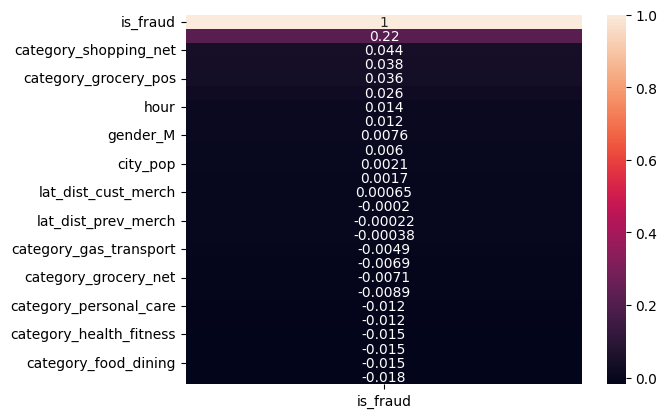

In [60]:
# Correlation matrix (focus on fraud correlation)
import seaborn as sns
corr = train_data.corr()
sns.heatmap(corr[['is_fraud']].sort_values('is_fraud', ascending=False), annot=True)

In [61]:
#split into x and y both train and test data
x_train = train_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']

x_test = test_data.drop(columns=['is_fraud'],axis=1)
y_test = test_data['is_fraud']

In [71]:
x_train.skew()

amt                         -0.297221
city_pop                     0.607334
hour                        -0.282992
day_of_week                 -0.078887
month                        0.298147
cust_age                    -0.181536
lat_dist_cust_merch         -0.000657
long_dist_cust_merch        -0.000837
lat_dist_prev_merch          0.151275
long_dist_prev_merch         0.149982
state_te                   220.196433
gender_M                     0.188395
category_food_dining         3.350398
category_gas_transport       2.637051
category_grocery_net         5.057378
category_grocery_pos         2.757526
category_health_fitness      3.489474
category_home                2.764191
category_kids_pets           2.931390
category_misc_net            4.197598
category_misc_pos            3.648095
category_personal_care       3.370431
category_shopping_net        3.219472
category_shopping_pos        2.866254
category_travel              5.386600
dtype: float64

In [70]:
skewed_cols = ['amt', 'city_pop', 'cust_age', 'lat_dist_prev_merch', 'long_dist_prev_merch', 'state_te']
x_train[skewed_cols] = x_train[skewed_cols].apply(lambda x: np.log1p(x))
x_test[skewed_cols] = x_test[skewed_cols].apply(lambda x: np.log1p(x))

In [73]:
train_data.head()

,amt,city_pop,is_fraud,hour,day_of_week,month,cust_age,lat_dist_cust_merch,long_dist_cust_merch,lat_dist_prev_merch,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,3495,0,0,1,1,30.814511,0.067507,0.870215,0.58546,...,0,0,0,0,1,0,0,0,0,0
1,107.23,149,0,0,1,1,40.531143,0.271247,0.024038,0.58546,...,1,0,0,0,0,0,0,0,0,0
2,220.11,4154,0,0,1,1,56.950034,0.969904,0.107519,0.58546,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1939,0,0,1,1,51.969884,0.803731,0.447271,0.58546,...,0,0,0,0,0,0,0,0,0,0
4,41.96,99,0,0,1,1,32.763860,0.254299,0.830441,0.58546,...,0,0,0,0,0,1,0,0,0,0


In [74]:
x_train,x_train_val,y_train,y_train_val = train_test_split(x_train,y_train, test_size=0.2,random_state=42,stratify=y_train)

In [75]:
#handle data imbalace by using SMOST
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [76]:
print(f"Before SMOTE: {np.bincount(y_train)}")
print(f"After SMOTE:  {np.bincount(y_train_res)}")

Before SMOTE: [660054   3843]
After SMOTE:  [660054 660054]


**# Building model**

In [77]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=10,class_weight=None ,random_state=42)

In [78]:
#model train
rf_model.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [79]:
# Predict
y_pred = rf_model.predict(x_train_val)
y_prob = rf_model.predict_proba(x_train_val)[:, 1]

**# Model evaluation**

In [80]:
print("Confusion Matrix:")
print(confusion_matrix(y_train_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_train_val, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_train_val, y_prob))

Confusion Matrix:
[[161141   3873]
 [   111    850]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9993    0.9765    0.9878    165014
           1     0.1800    0.8845    0.2991       961

    accuracy                         0.9760    165975
   macro avg     0.5896    0.9305    0.6434    165975
weighted avg     0.9946    0.9760    0.9838    165975

ROC-AUC Score: 0.9865044686335509


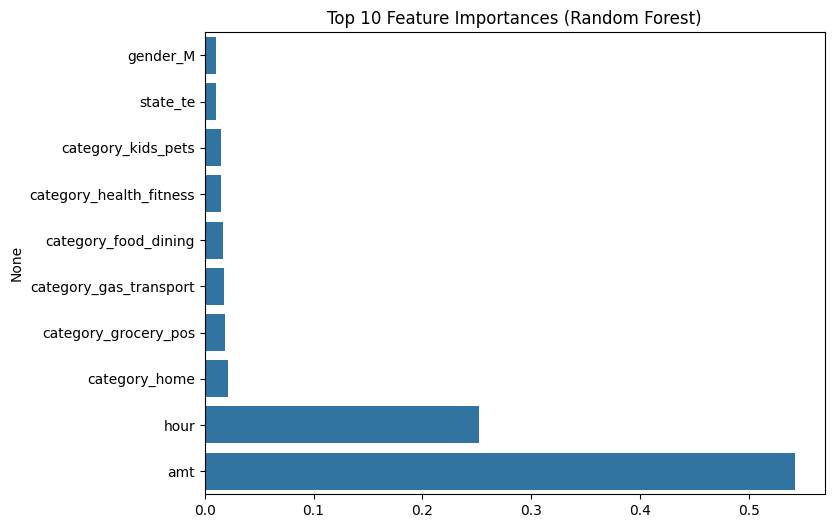

In [82]:
feature_names = x_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [83]:
#perdicate by test_dataseta by test dataset
# Predict class labels
y_pred_test = rf_model.predict(x_test)

# Predict probabilities (if needed for threshold tuning or ROC-AUC)
y_prob_test = rf_model.predict_proba(x_test)[:, 1]


In [84]:
#evaluate by testdata
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob_test))

Confusion Matrix:
[[543790   9784]
 [   305   1840]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.16      0.86      0.27      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.92      0.63    555719
weighted avg       1.00      0.98      0.99    555719


ROC-AUC Score:
0.9821629092942414
